In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("imdbtrain.csv")

In [ ]:
df.head()

Text  sentiment
0  I grew up (b. 1965) watching and loving the Th...          0
1  When I put this movie in my DVD player, and sa...          0
2  Why do people who do not know what a particula...          0
3  Even though I have great interest in Biblical ...          0
4  Im a die hard Dads Army fan and nothing will e...          1

In [ ]:
df.columns

Index(['Text', 'sentiment'], dtype='object')

In [ ]:
tweet_df = df[['sentiment','Text']]
print(tweet_df.shape)
tweet_df.head(5)

(5999, 2)


sentiment                                               Text
0          0  I grew up (b. 1965) watching and loving the Th...
1          0  When I put this movie in my DVD player, and sa...
2          0  Why do people who do not know what a particula...
3          0  Even though I have great interest in Biblical ...
4          1  Im a die hard Dads Army fan and nothing will e...

In [ ]:
#tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
#print(tweet_df.shape)
#tweet_df.head(5)

(11541, 2)


text airline_sentiment
1  @VirginAmerica plus you've added commercials t...          positive
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative
5  @VirginAmerica seriously would pay $30 a fligh...          negative
6  @VirginAmerica yes, nearly every time I fly VX...          positive

In [ ]:
tweet_df["sentiment"].value_counts()

0    3080
1    2919
Name: sentiment, dtype: int64

In [ ]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 0]), Int64Index([0, 1], dtype='int64'))

In [ ]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'with': 15, 'for': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'his': 23, 'are': 24, 'have': 25, 'he': 26, 'one': 27, 'be': 28, 'at': 29, 'all': 30, 'an': 31, 'by': 32, 'they': 33, 'who': 34, 'like': 35, 'so': 36, 'from': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, 'if': 42, 'has': 43, 'out': 44, "it's": 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'up': 52, 'very': 53, 'she': 54, 'time': 55, 'my': 56, 'no': 57, 'would': 58, 'which': 59, 'even': 60, 'really': 61, 'story': 62, 'their': 63, 'had': 64, 'only': 65, 'see': 66, 'well': 67, 'can': 68, 'me': 69, 'were': 70, 'than': 71, 'much': 72, 'we': 73, 'been': 74, 'great': 75, 'bad': 76, 'also': 77, 'do': 78, 'other': 79, 'get': 80, 'will': 81, 'into': 82, 'people': 83, 'because': 84, 'most': 85, 'first': 86, 'him': 87, 'how': 88, "don't":

In [ ]:
print(tweet[0])
print(encoded_docs[0])

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
[10, 2104, 52, 577, 145, 3, 1412, 1, 30, 56, 29, 376, 291, 73, 262, 157, 376, 315, 3, 100, 376, 73, 30, 440, 5, 28, 39, 1210,

In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   10 2104   52  577  145    3 1412    1   30   56   29  376
  291   73  262  157  376  315    3  100  376   73   30  440    5   28
   39 1210   57   27  440    5   28 1570  178   37  412  965   31  585
  805   10  494   56  442    5   66    1   17 1636   33   58   80    2
 3637    4   48   10  410   14    2  536   88 1323    1   65  294  221
   13    1  745 2603   21   12    9   97 1553   15    1  220  574    4
    1 2546  393 2202   27  746 1341  131  278    4    1  214 2547    3
   23  307 1008  144  488    8   23 1159 2796   23  332   13  334 3379
    2  443    4   19 2168 2035    2 1371 1042  193   28 4239   18   15
   13 

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1495424   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,512,075
Trainable params: 1,512,075
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
150/150 [==============================] - 35s 215ms/step - loss: 0.6777 - accuracy: 0.5814 - precision: 0.6131 - recall: 0.3663 - val_loss: 0.6261 - val_accuracy: 0.7067 - val_precision: 0.6622 - val_recall: 0.8356
Epoch 2/5
150/150 [==============================] - 31s 208ms/step - loss: 0.4526 - accuracy: 0.8012 - precision: 0.7877 - recall: 0.8067 - val_loss: 0.4256 - val_accuracy: 0.8042 - val_precision: 0.7643 - val_recall: 0.8758
Epoch 3/5
150/150 [==============================] - 31s 208ms/step - loss: 0.3245 - accuracy: 0.8723 - precision: 0.8689 - recall: 0.8670 - val_loss: 0.4004 - val_accuracy: 0.8383 - val_precision: 0.8150 - val_recall: 0.8725
Epoch 4/5
150/150 [==============================] - 31s 207ms/step - loss: 0.2637 - accuracy: 0.8973 - precision: 0.8927 - recall: 0.8954 - val_loss: 0.4225 - val_accuracy: 0.8275 - val_precision: 0.8194 - val_recall: 0.8372
Epoch 5/5
150/150 [==============================] - 31s 204ms/step - loss: 0.2373 - accuracy: 0

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

<Figure size 640x480 with 0 Axes>

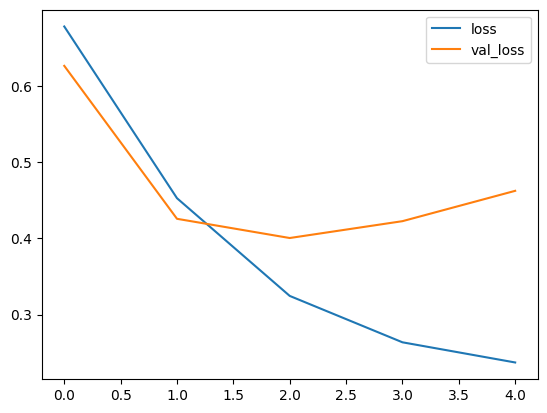

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(array):
    tw = tokenizer.texts_to_sequences([array])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    #print("Predicted label: ", sentiment_label[1][prediction])
    pred = sentiment_label[1][prediction]
    return pred

1/1 [==============================] - 0s 31ms/step
197
29
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


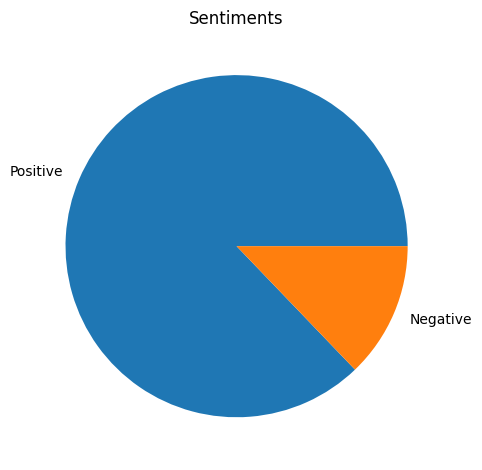

In [ ]:
from os import pwrite
#test_sentence1 = "I enjoyed my journey on this flight."
#predict_sentiment(test_sentence1)

#test_sentence2 = "This is the worst thing!"
#predict_sentiment(test_sentence2)

dft = pd.read_csv("testingsample.csv")
text2 = dft["Text"]
pos = 0
neg = 0

import csv 
pw = []
nw = []
for row in text2:
  #print(row)
  predval = predict_sentiment(row)
  if predval == 1:
    pos = pos + 1 
    pw.append(row)  
  else: 
    neg = neg + 1
    nw.append(row)
   
print(pos)
print(neg)

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS.copy()

#convert list to string and generate
unique_string=(" ").join(pw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

unique_=(" ").join(nw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_namei"+".png", bbox_inches='tight')
plt.show()
plt.close()

import numpy as np
#y = np.array([pos, neg])
#mylabels = ["Positive, Negative"]
#plt.pie(y, labels = mylabels)
#plt.show() 

x = [pos, neg]
mylabels = ['Positive', 'Negative']

fig, ax = plt.subplots()
ax.pie(x, labels=mylabels)
ax.set_title('Sentiments')
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')